In [3]:
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt

Loading Pretrained Face Detector Model...
Loading Test Image ...
Computing object detections...


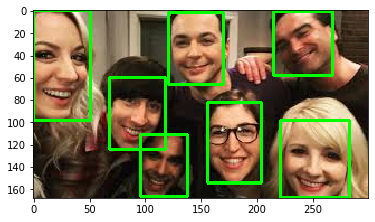

In [4]:
print("Loading Pretrained Face Detector Model...")
face_detector="./Face_Detector/"
prototxtPath = os.path.sep.join([face_detector, "deploy.prototxt"])
weightsPath = os.path.sep.join([face_detector,"res10_300x300_ssd_iter_140000.caffemodel"])
    
face_model_net = cv2.dnn.readNet(prototxtPath, weightsPath)

print("Loading Test Image ...")
test_image="./Test_Images/bbt2.jpg"
image=cv2.imread(test_image)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,(300, 300), (104.0, 177.0, 123.0))


# pass the blob through the network and obtain the detections and predictions
print("Computing object detections...")
face_model_net.setInput(blob)
detections = face_model_net.forward()
for i in range(0, detections.shape[2]):
    # extract the probability associated with the prediction
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        # compute the (x, y)-coordinates of the bounding box for the object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        if (startY-10>10):
            y = startY-10
        else:
            y =startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY),(0,255, 0 ), 2)

imgrgb = image[:,:,::-1]
plt.imshow(imgrgb)
plt.show()